## Task 12

Simulate 1000 women, starting in state 1, until death, using the same Q
as in the previous part. For each of the women, create a vector (or time
series) of her observed states Y(i) . A time series will consist of the values
Y(i) = (X(0), X(48), X(96), . . . ,). The time series should continue until
death, thus the last value in each of the time series should be 5.

In [127]:
import numpy as np

# Our Continuous-Time Markov Chains (CTMC) 
def CTMC(n, Q):
    states = []
    jump_times = []
    for _ in range(n):
        state = []
        jump_time = []
        jump_time.append(0) #initial time
        # Initial state
        current_state = 0 # state 1 --> index 0
        state.append(current_state) # first state which is always state 1
        while current_state != 4:
            # Making a jump based on rate
            rate = -Q[current_state, current_state]
            time_t = np.random.exponential(1/rate) # Getting the time t from the exp.dist based on rate
            probs = Q[current_state, :]/rate # Calculating probabilities
            probs[current_state] = 0 # will not remain in same state
            next_state = np.random.choice([0, 1, 2, 3, 4], p=probs)
            state.append(next_state) # Keeping records of which state the women is in
            current_state = next_state # Change of state to next state
            jump_time.append(time_t)
            if current_state == 4:
                states.append(state) # keeping records of each lifetime
                jump_times.append(np.cumsum(jump_time)) # keeping records of each jump time

    return states, jump_times

# Transition-rate matrix Q with :
Q = np.array([
    [-0.0085, 0.005, 0.0025, 0.0, 0.001], 
    [0.0, -0.014, 0.005, 0.004, 0.005],   
    [0.0, 0.0, -0.008, 0.003, 0.005],   
    [0.0, 0.0, 0.0, -0.009, 0.009],   
    [0.0, 0.0, 0.0, 0.0, 0.0]
])

nr_women = 1_000
## Simulating ##
states, jump_times = CTMC(nr_women, Q)

In [128]:
import bisect

# Create time series Y where we check the state of women every 48 months
Y = []
for i in range(nr_women):
    y_i = []
    y_i.append(0) # Appending first state 1 index 0
    state_i = states[i]
    jump_times_i = jump_times[i]
    k = 0
    t = 48
    while y_i[-1] != 4:
        index = bisect.bisect_right(jump_times_i, t) - 1
        y_i.append(state_i[index])
        t += 48
    
    Y.append(y_i)
# Adding +1 to every state so that it's in correct state instead of the index    
# for y_i in Y:
#     for i in range(len(y_i)):
#         y_i[i] += 1

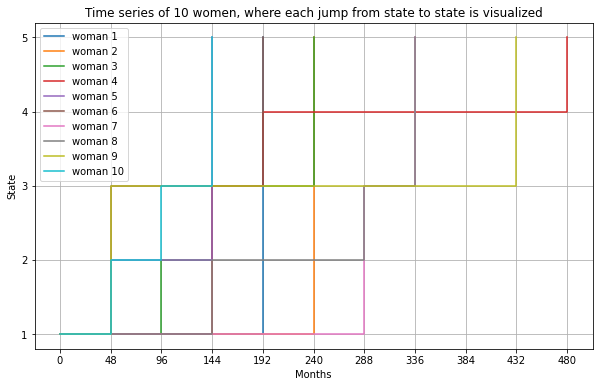

In [124]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Plotting each woman's state over time
max_lim = 0
n = 10
for i in range(n):
    # Generate time points for the steps
    time_points = np.arange(0, len(Y[i]) * 48, 48)
    plt.step(time_points, Y[i], where='post', label=f"woman {i+1}")
    if max_lim < len(Y[i]):
        max_lim = len(Y[i]) 

plt.title(f"Time series of {n} women, where each jump from state to state is visualized")
plt.xlabel('Months')
plt.ylabel('State')
plt.xticks(np.arange(0, max_lim*48, 48))  # Adjusting the range for better visualization
plt.yticks([1, 2, 3, 4, 5])
#plt.xlim(right=max_lim*48)  # Adjusting xlim to fit the data (change as needed)
plt.legend()
plt.grid(True)
plt.show()


In [129]:
Y

[[0, 0, 0, 0, 3, 4],
 [0, 0, 0, 2, 2, 2, 4],
 [0, 1, 1, 1, 2, 2, 2, 3, 4],
 [0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 4],
 [0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 4],
 [0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 4],
 [0, 1, 2, 2, 2, 2, 2, 2, 2, 4],
 [0, 4],
 [0, 4],
 [0, 0, 0, 0, 0, 0, 0, 2, 4],
 [0, 2, 2, 2, 4],
 [0, 0, 0, 4],
 [0, 4],
 [0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4],
 [0, 0, 2, 3, 4],
 [0, 0, 0, 1, 1, 2, 4],
 [0, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4],
 [0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 4],
 [0, 1, 1, 1, 1, 1, 2, 2, 4],
 [0, 1, 4],
 [0, 0, 0, 0, 0, 0, 4],
 [0, 0, 0, 4],
 [0, 1, 1, 1, 1, 1, 3, 4],
 [0, 0, 0, 3, 3, 4],
 [0, 0, 0, 0, 0, 3, 4],
 [0, 0, 0, 0, 0, 0, 0, 0, 2, 4],
 [0, 0, 0, 1, 1, 3, 3, 3, 4],
 [0, 0, 0, 2, 2, 4],
 [0, 0, 4],
 [0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 4],
 [0, 2, 2, 2, 3, 3, 4],
 [0, 0, 0, 1, 1, 2, 2, 4],
 [0, 0, 0, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 4],
 [0, 0, 0, 4],
 [0, 0, 0, 4],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 4],
 [0, 2, 2, 2, 3, 4],
 [0, 0, 0, 1, 2, 4],
 [0, 0, 0,

## Task 13

For the remainder of this part, we will assume those 1000 time series is all
we have observed.
It can be shown that an unbiased estimator of the transition rates, $q_{ij}$, is

$$q_{ij} = \frac{N_{ij}}{S_i}, \quad \text{for } i \neq j$$

Where $N_{ij}$ is the total number of jumps (for all of the women) from state i
to j, and $S_i$ is the total sojourn time in state i (for all of the women). The
diagonal elements are found from equation (1). The problem is that $N_{ij}$ and
$S_i$ are unknown, all we know are the timeseries of observations every 4’th year.

$$q_{ii} = -(q_{i1} + \ldots + q_{i(i-1)} + q_{i(i+1)} + \ldots + q_{iN}, \quad \text{for } i = 1, \ldots, N $$

One approach to estimation is to recreate $N_{ij}$ and $S_i$ from the partial information that we have observed.

In [112]:
import numpy as np
import bisect

# Our Continuous-Time Markov Chain (CTMC) modified for task 13
def CTMC_estimate(Q, Y_obs):
    state = []
    jump_time = []
    jump_time.append(0) #initial time
    current_state = 0 # state 1 --> index 0
    state.append(current_state) # first state which is always state 1
    while current_state != 4:
        # Making a jump based on rate
        rate = -Q[current_state, current_state]
        time_t = np.random.exponential(1/rate) # Getting the time t from the exp.dist based on rate
        probs = Q[current_state, :]/rate # Calculating probabilities
        probs[current_state] = 0 # will not remain in same state
        next_state = np.random.choice([0, 1, 2, 3, 4], p=probs) # Taken on time_t
        state.append(next_state) # Keeping records of which state the women is in
        current_state = next_state # Change of state to next state
        jump_time.append(time_t)

    return state, jump_time

def check_state_matches(sim_states, jump_times, obs_state, t):
    # check the state of women every 48 months
    index = bisect.bisect_right(jump_times, t) - 1
    if sims_states[index] == obs_state[index]:
        return True
    else:
        False

In [126]:
import numpy as np

def create_random_upper_triangular_transition_rate_matrix(n, absorbing_states):
    # Initialize an n x n matrix with zeros
    Q = np.zeros((n, n))
    # Fill the upper triangular part with random values
    for i in range(n):
        if i not in absorbing_states:
            for j in range(i+1, n):
                Q[i, j] = np.random.rand() * 0.01  # Random values scaled for realism
    # Adjust the diagonal elements to ensure rows sum to zero for non-absorbing states
    for i in range(n):
        if i not in absorbing_states:
            Q[i, i] = -np.sum(Q[i, i+1:])
    
    return Q

n_states = 5
absorbing_states = [4] # Index of absorbing state, at state 5 (last state)
Q_initial = create_random_upper_triangular_transition_rate_matrix(n_states, absorbing_states)
print("Random Upper Triangular Transition Rate Matrix (Generator Matrix) for an Absorbing Markov Chain estimation of Q:")
print(Q_initial)


Random Upper Triangular Transition Rate Matrix (Generator Matrix) for an Absorbing Markov Chain estimation of Q:
[[-0.0258784   0.00677977  0.00896562  0.00452352  0.00560949]
 [ 0.         -0.01055823  0.00274323  0.00475026  0.00306474]
 [ 0.          0.         -0.00529038  0.00083717  0.00445321]
 [ 0.          0.          0.         -0.00343261  0.00343261]
 [ 0.          0.          0.          0.          0.        ]]


In [ ]:
# Run the simulation with the 3 steps
Q_k = Q_initial
not_converged = true
# np.linalg.norm(, ord=np.inf) => 10**-3

while not_converged:
    # For each women
    for i in range(nr_women):
        states = CTMC_estimate(Q_k, Y[i])
        
    
